In [1]:
pip install split-folders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import splitfolders
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
!unzip no_trash.zip

Archive:  no_trash.zip
   creating: no_trash/
  inflating: __MACOSX/._no_trash     
   creating: no_trash/paper/
  inflating: __MACOSX/no_trash/._paper  
  inflating: no_trash/.DS_Store      
  inflating: __MACOSX/no_trash/._.DS_Store  
   creating: no_trash/metal/
  inflating: __MACOSX/no_trash/._metal  
   creating: no_trash/cardboard/
  inflating: __MACOSX/no_trash/._cardboard  
   creating: no_trash/glass/
  inflating: __MACOSX/no_trash/._glass  
   creating: no_trash/plastic/
  inflating: __MACOSX/no_trash/._plastic  
  inflating: no_trash/paper/paper283.jpg  
  inflating: __MACOSX/no_trash/paper/._paper283.jpg  
  inflating: no_trash/paper/paper297.jpg  
  inflating: __MACOSX/no_trash/paper/._paper297.jpg  
  inflating: no_trash/paper/paper526.jpg  
  inflating: __MACOSX/no_trash/paper/._paper526.jpg  
  inflating: no_trash/paper/paper240.jpg  
  inflating: __MACOSX/no_trash/paper/._paper240.jpg  
  inflating: no_trash/paper/paper254.jpg  
  inflating: __MACOSX/no_trash/paper/._p

In [4]:
splitfolders.ratio("no_trash", output="split_no_trash", seed=42, ratio=(0.9, 0.05, 0.05))

Copying files: 2390 files [00:00, 5003.83 files/s]


In [5]:
train_path="split_no_trash/train"
val_path="split_no_trash/val"
test_path="split_no_trash/test"

In [6]:
x_train=[]
x_val=[]
x_test=[]

In [7]:
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_train.append(img_arr)

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_val.append(img_arr)
        
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_test.append(img_arr)

In [8]:
train_x=np.array(x_train)
val_x=np.array(x_val)
test_x=np.array(x_test)

In [ ]:
# train_x=train_x/255.0
# val_x=val_x/255.0
# test_x=test_x/255.0

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory(train_path, target_size = (384, 512),
                                                 batch_size = 72, class_mode = "categorical")

val_set = val_datagen.flow_from_directory(val_path, target_size = (384, 512),
                                            batch_size = 72, class_mode = "categorical")

test_set = test_datagen.flow_from_directory(test_path,target_size = (384, 512),
                                            batch_size = 72, class_mode = "categorical")

Found 2148 images belonging to 5 classes.
Found 118 images belonging to 5 classes.
Found 124 images belonging to 5 classes.


In [11]:
train_y=training_set.classes
val_y=val_set.classes
test_y=test_set.classes

In [12]:
training_set.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

In [13]:
train_y.shape,test_y.shape,val_y.shape

((2148,), (124,), (118,))

In [35]:
model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=12, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=18, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.5),

    Flatten(),

    # Dense(64, activation='relu'),
    # Dropout(0.5),
    
    # Dense(32, activation='relu'),
    # Dropout(0.5),
    
    Dense(6, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 192, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 96, 128, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 48, 64, 12)      

In [37]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [38]:
early_stop=EarlyStopping(monitor="accuracy",
                         mode="auto",
                         verbose=1,
                         patience=10)

In [39]:
results = model.fit(train_x,
                    train_y,
                    validation_data=(val_x, val_y),
                    epochs=30,
                    callbacks=[early_stop])
                    # batch_size=43,
                    # verbose=1,
                    # shuffle=True)

Epoch 1/30
68/68 [==============================] - 9s 121ms/step - loss: 2.3594 - accuracy: 0.2249 - val_loss: 1.5825 - val_accuracy: 0.3051
Epoch 2/30
68/68 [==============================] - 8s 116ms/step - loss: 1.5669 - accuracy: 0.3152 - val_loss: 1.4372 - val_accuracy: 0.4492
Epoch 3/30
68/68 [==============================] - 8s 116ms/step - loss: 1.5150 - accuracy: 0.3394 - val_loss: 1.3888 - val_accuracy: 0.4576
Epoch 4/30
68/68 [==============================] - 8s 116ms/step - loss: 1.4572 - accuracy: 0.3790 - val_loss: 1.3885 - val_accuracy: 0.4492
Epoch 5/30
68/68 [==============================] - 8s 116ms/step - loss: 1.4457 - accuracy: 0.3911 - val_loss: 1.3474 - val_accuracy: 0.4322
Epoch 6/30
68/68 [==============================] - 8s 116ms/step - loss: 1.4145 - accuracy: 0.3929 - val_loss: 1.3509 - val_accuracy: 0.4068
Epoch 7/30
68/68 [==============================] - 8s 116ms/step - loss: 1.4052 - accuracy: 0.3971 - val_loss: 1.4691 - val_accuracy: 0.4576
Epoch 

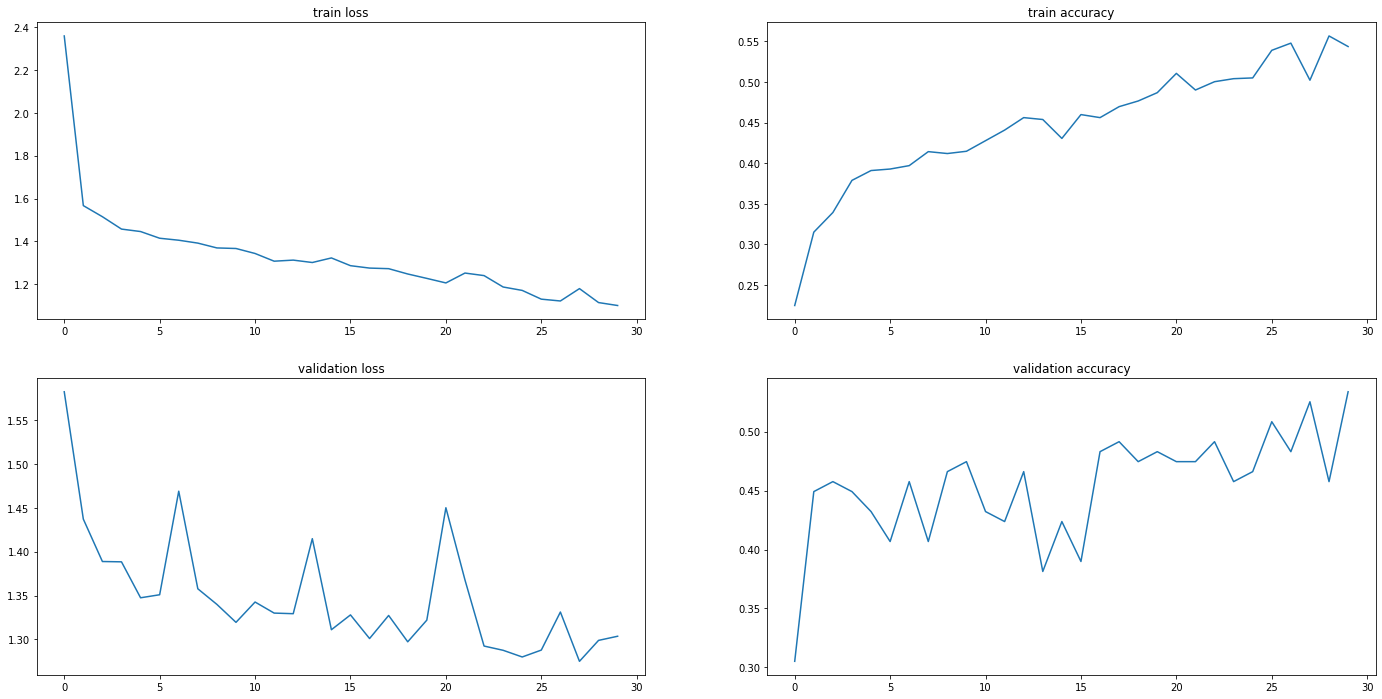

In [40]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(24,12))

ax[0][0].plot(results.history["loss"])
ax[0][1].plot(results.history["accuracy"])
ax[1][0].plot(results.history["val_loss"])
ax[1][1].plot(results.history["val_accuracy"])

ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()

In [41]:
model.evaluate(test_x, test_y, batch_size=43)

3/3 [==============================] - 1s 279ms/step - loss: 1.4078 - accuracy: 0.4274


[1.4077541828155518, 0.42741936445236206]

In [42]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

In [43]:
print(confusion_matrix(y_pred, test_y))

[[ 8  7  0  3  4]
 [ 7 14  9  7  4]
 [ 2  1  6  3  0]
 [ 2  3  6 13  5]
 [ 2  1  0  5 12]]


In [23]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.19      0.31      0.24        13
           1       0.38      0.36      0.37        28
           2       0.38      0.38      0.38        21
           3       0.32      0.31      0.32        32
           4       0.40      0.33      0.36        30

    accuracy                           0.34       124
   macro avg       0.34      0.34      0.33       124
weighted avg       0.35      0.34      0.34       124

